# miracle_in_cell_no_7_nlp.ipynb 파일에서 나눈 review_Okt.csv 파일을 분석하기 위한 파일

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 파일 불러오기
reviews = pd.read_csv("./data/reviews_Okt.csv")
reviews.head()

,평점,내용,영화,설정,억지,배우,중심,류승룡,천만,실체,...,훈수,싸개,천추,금지법,제정,애드밸룬,독극물,박탈,못봣,콧대
0,10,영화는 뻔했고 설정은 억지였다 하지만 그걸 살려낸 배우들이 대단한영화. 그중심엔 ...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,천만영화의 부끄러운 실체. 배우들간의 앙상블은 훌륭했으나 작위적이고 평면적인 스토리...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,천만관객을 끌어모은 것은 오직 배우들의 힘.,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,뜬금없는 열기구...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,연기 정말 장난아님,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 각 단어 컬럼들의 합을 구한 데이터프레임 제작
review_sum = reviews.sum()
review_sum = pd.DataFrame(review_sum[2:])
review_sum.columns = ["리뷰수"]

In [4]:
# 점수합계 순으로 정렬하기
review_sum.sort_values("리뷰수", ascending=False, inplace=True)
review_sum

,리뷰수
영화,17366.0
감동,10944.0
진짜,5989.0
정말,5747.0
눈물,5492.0
...,...
배길수,1.0
엿먹으,1.0
악글,1.0
재밋게봐,1.0


In [5]:
review_sum.iloc[0:50,]

,리뷰수
영화,17366.0
감동,10944.0
진짜,5989.0
정말,5747.0
눈물,5492.0
연기,5076.0
최고,5008.0
류승룡,3515.0
배우,2985.0
처음,2402.0


In [6]:
reviews.loc[reviews["영화"] == 1, "평점"]

0        10
1         7
5         4
6         1
8         3
         ..
44419     4
44424     1
44426     1
44427     1
44428     6
Name: 평점, Length: 17366, dtype: int64

In [7]:
df = reviews.loc[reviews["영화"] == 1]
len(df["평점"].value_counts())

10

In [8]:
# 평점에 대한 히스토그램을 그려주는 함수
# 문제점! : 평점 카운트를 나타냈을때 0개인 것이 있는 컬럼에 대해서는 에러가 뜸

## 평점 비율에 대한 글씨 출력하는 함수
def positive_negative(df_col = "전체"):
    if df_col == "전체":
        df = reviews
        title_str = f'{df_col}'
    else:
        df = reviews.loc[reviews[df_col] == 1]
        title_str = f'"{df_col}" 단어가 포함된 리뷰의 평점 비율'
    
    total_reviews = len(df["평점"])
    negative_str = f'부정 : {round(df["평점"].value_counts().sort_index()[0:3].sum() / df["평점"].value_counts().sum() * 100, 2)} %'
    medium_str = f'중간 : {round(df["평점"].value_counts().sort_index()[3:7].sum() / df["평점"].value_counts().sum() * 100, 2)} %'
    positive_str = f'긍정 : {round(df["평점"].value_counts().sort_index()[7:10].sum() / df["평점"].value_counts().sum() * 100, 2)} %'

    print_str = f"{title_str}\n-------------------------------------------\n총 리뷰수 : {total_reviews}\n{negative_str}\n{medium_str}\n{positive_str}"
    return print_str

## 그래프 그리는 함수
def histplotting(df_col="전체"):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)

    if df_col == "전체":
        df = reviews
        title_str = "전체 리뷰의 평점 히스토그램"
    else:
        df = reviews.loc[reviews[df_col] == 1]
        title_str = f'"{df_col}" 단어가 포함된 리뷰의 평점 히스토그램'
        
    sns.histplot(df["평점"], binwidth=1, discrete=True, shrink=0.8, ax=ax1)
    for i in range(1, len(df["평점"].value_counts()) + 1):
        plt.text(i-1/10, df["평점"].value_counts().sort_index()[i] + (df["평점"].value_counts().max() / 100), df["평점"].value_counts().sort_index()[i], fontsize=12)

    plt.text(2, df["평점"].value_counts().max() / 2, positive_negative(df_col), fontsize=25)

    ax1.set_title(title_str)
    ax1.set_xticks(range(1,11))
    plt.savefig(f"./data/plot/{df_col}.jpg")
    plt.show()



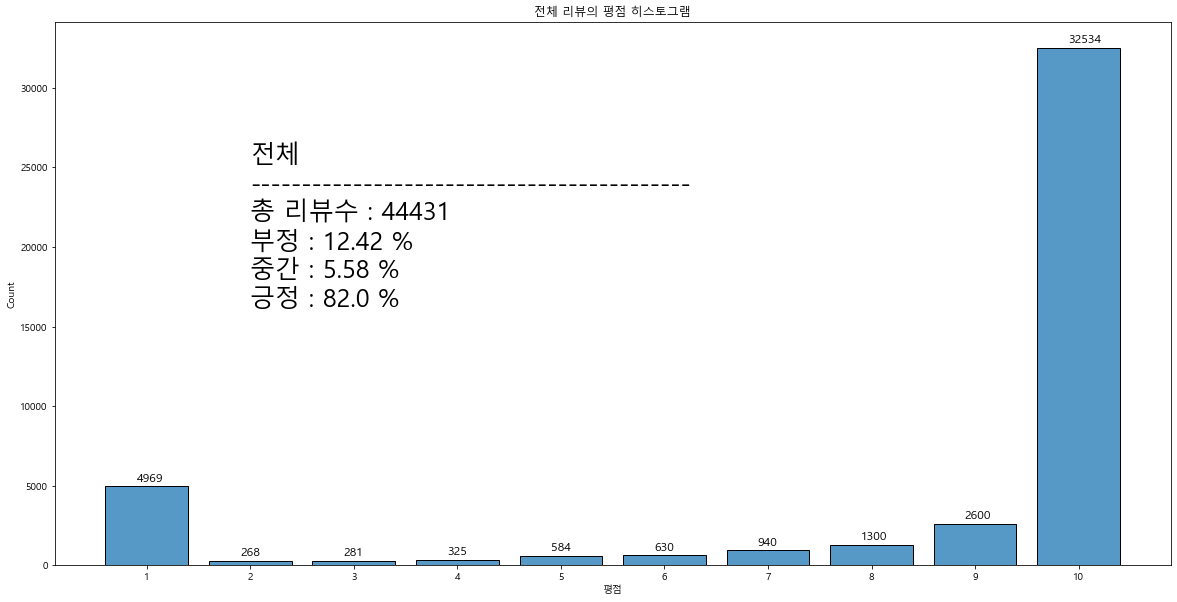

In [9]:
histplotting()

In [10]:
review_sum[review_sum["리뷰수"] >= 1000]

,리뷰수
영화,17366.0
감동,10944.0
진짜,5989.0
정말,5747.0
눈물,5492.0
연기,5076.0
최고,5008.0
류승룡,3515.0
배우,2985.0
처음,2402.0


- 리뷰수가 1000개가 넘는 단어들 중에서 핵심 내용을 담은 단어들만 추출
- 감동, 눈물, 연기, 류승룡, 배우, 재미, 스토리, 웃음, 억지

In [11]:
col_names = ["감동", "눈물", "연기", "류승룡", "배우", "재미", "스토리", "웃음", "억지"]

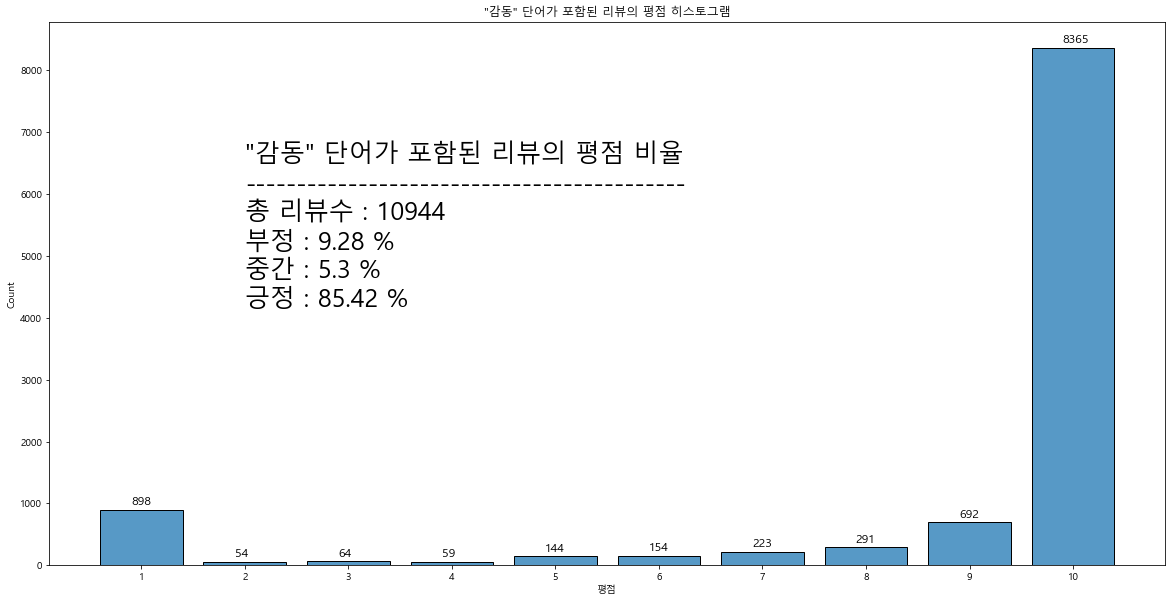

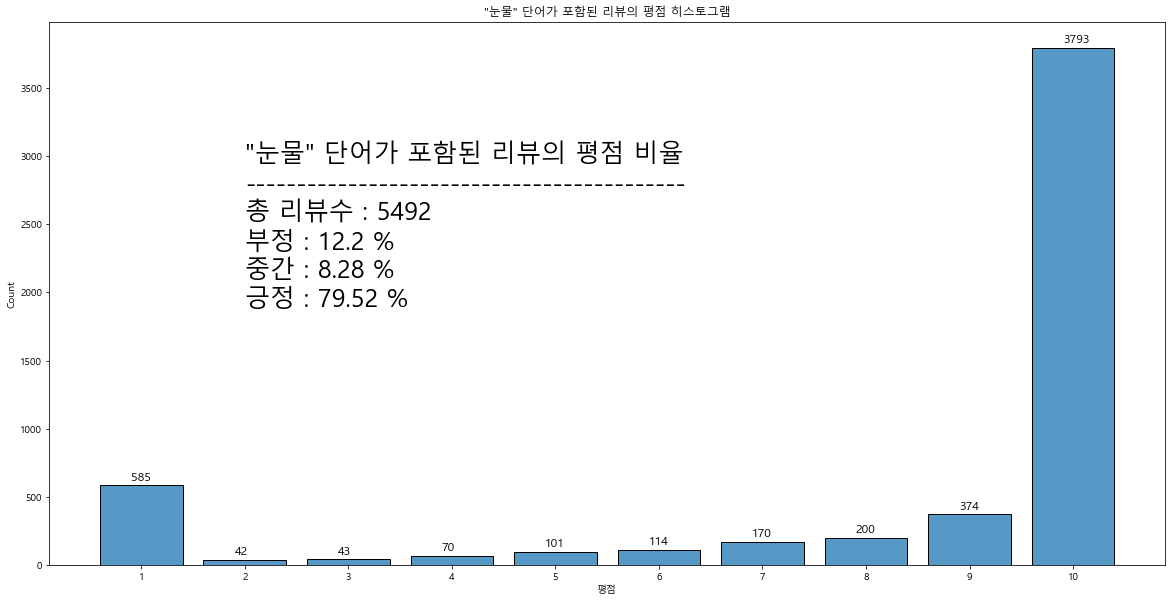

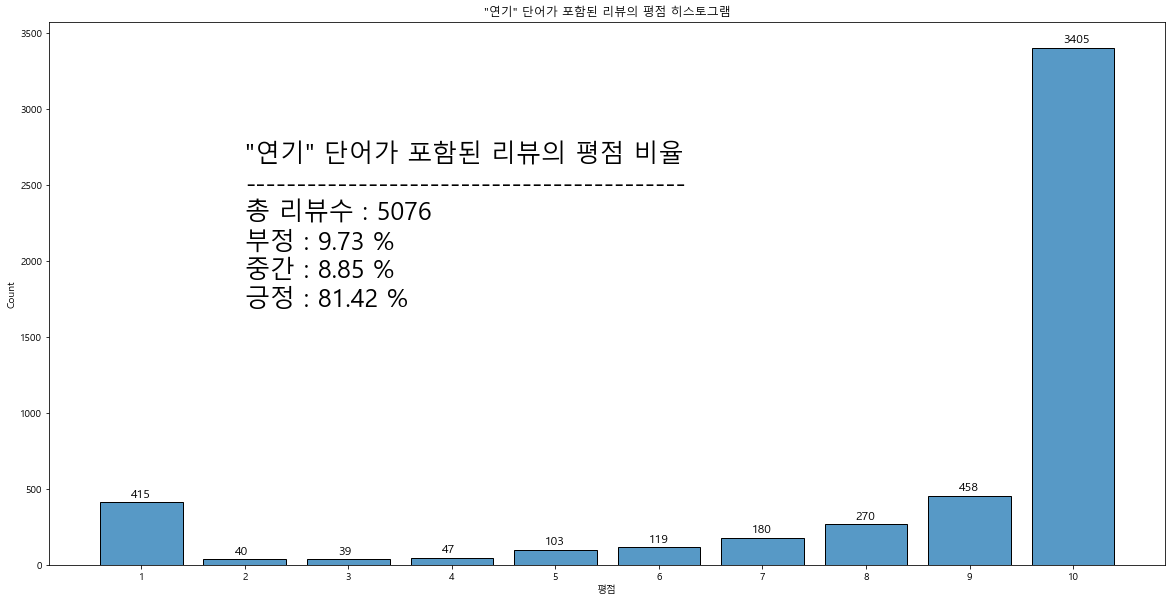

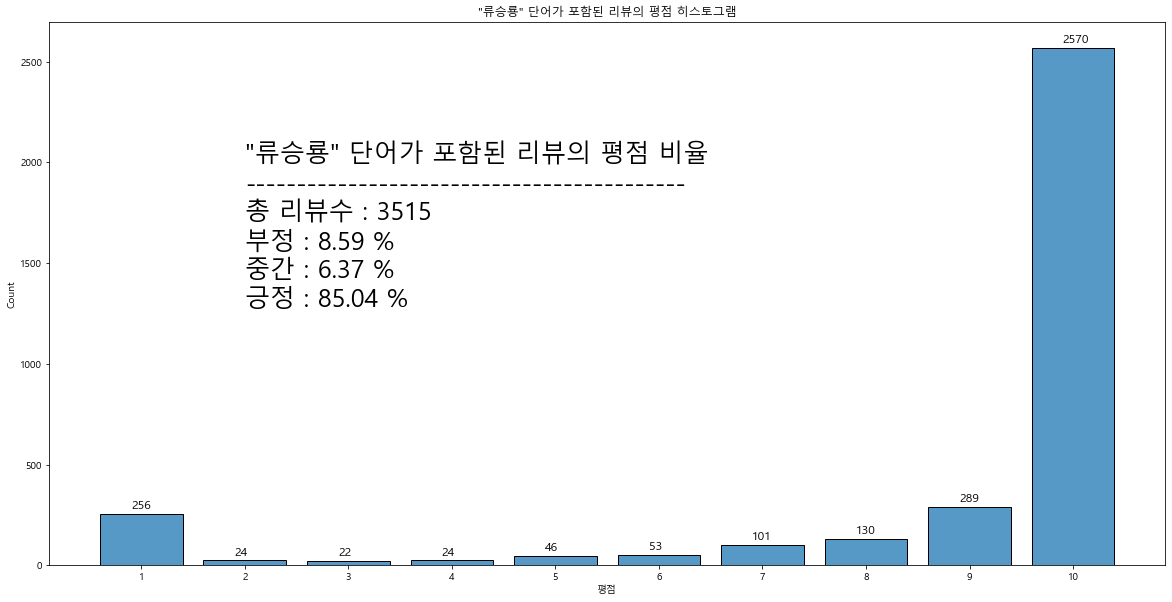

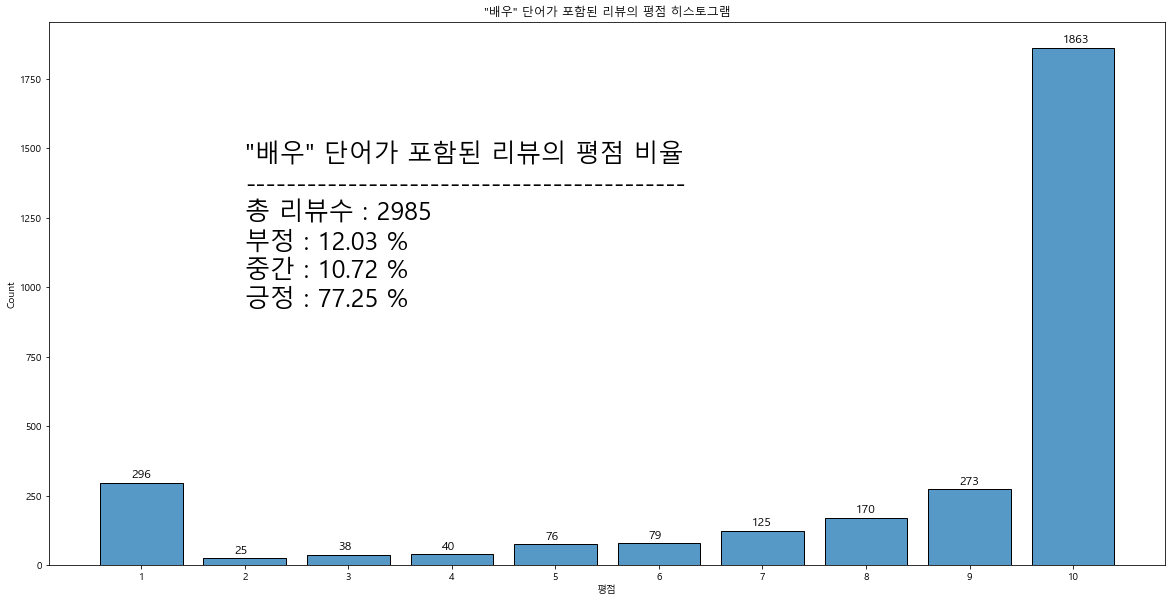

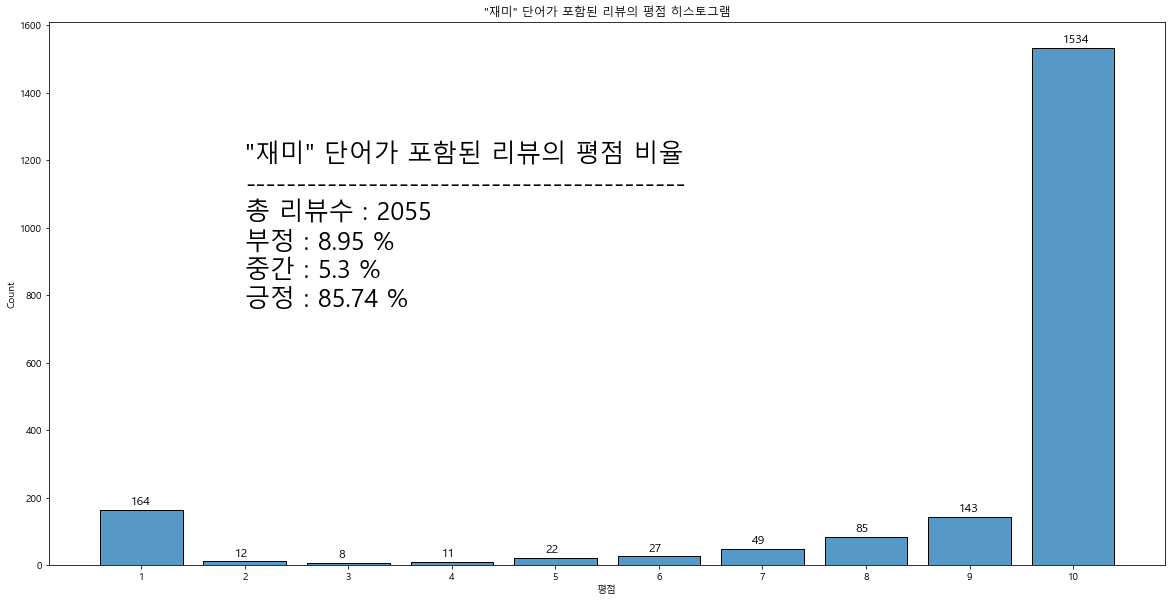

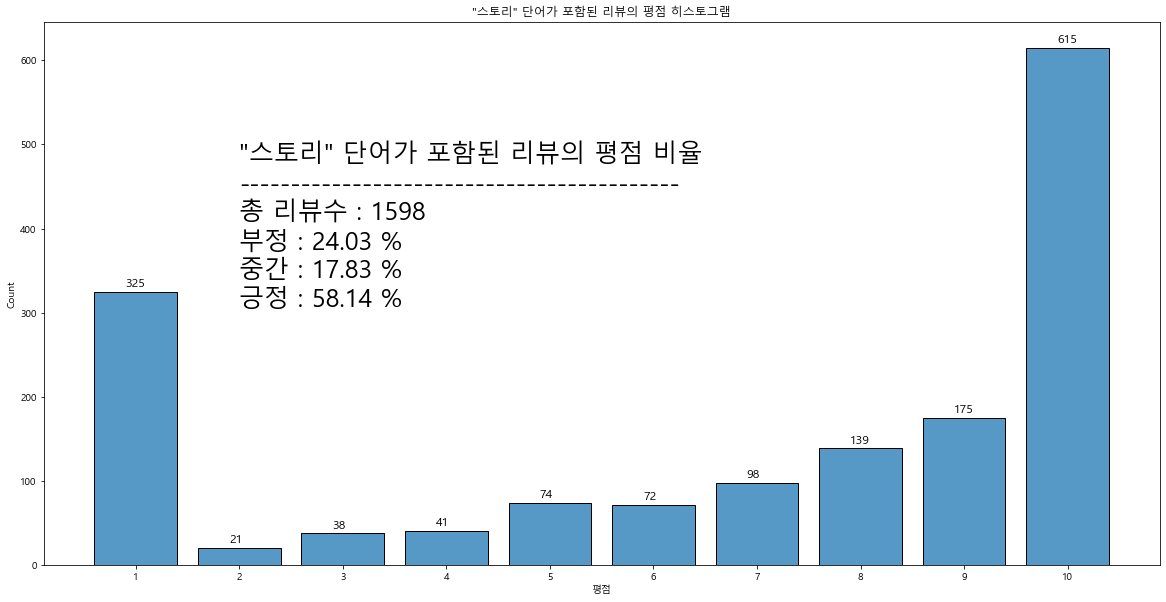

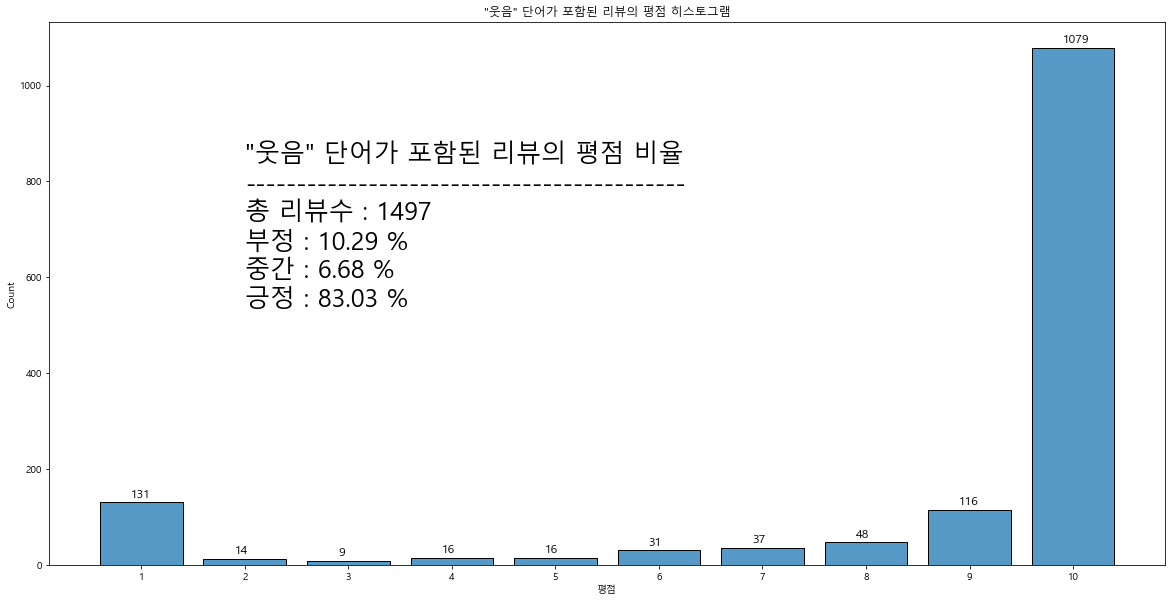

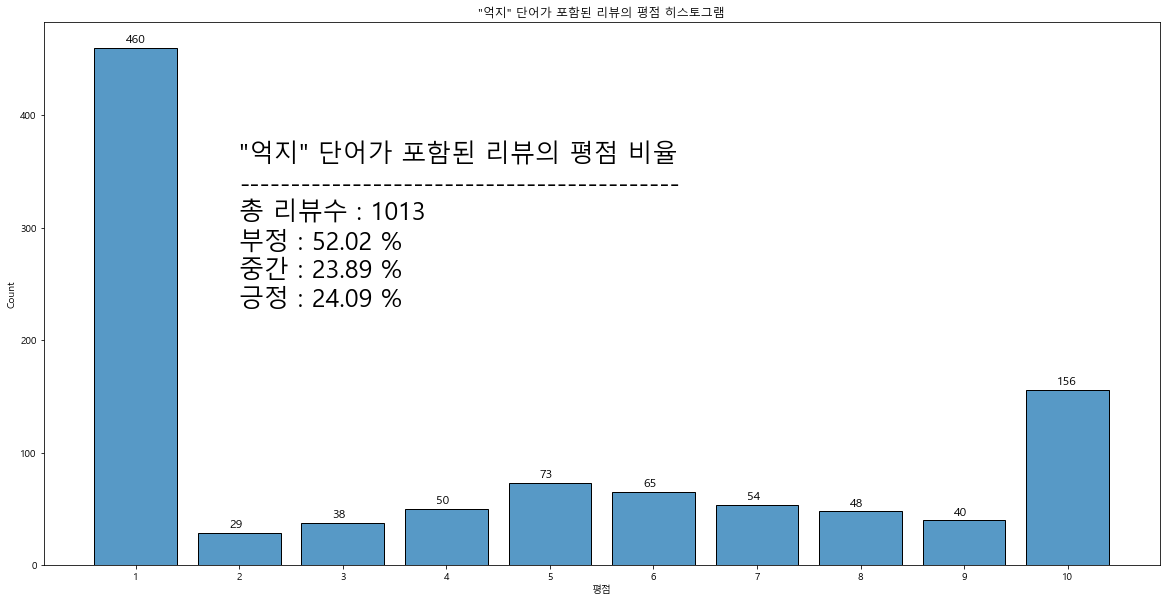

In [12]:
for col_name in col_names:
    try:
        histplotting(col_name)
    except:
        print(col_name)

- 추가적으로 아버지 라는 단어가 포함된 리뷰에 대한 내용

In [13]:
review_sum.loc[["아빠", "아버지"],]


,리뷰수
아빠,796.0
아버지,324.0


In [14]:
reviews.loc[(reviews["아버지"] == 1) | (reviews["아빠"] == 1), ]

,평점,내용,영화,설정,억지,배우,중심,류승룡,천만,실체,...,훈수,싸개,천추,금지법,제정,애드밸룬,독극물,박탈,못봣,콧대
30,10,딸있는 아버지라면. 감동 10배,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,10,예승이가 하나둘셋했는데 용구가 안나오자 예승이가 아빠찾는거..너무 슬퍼요,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,10,돌아가신 아버지 생각이 간절합니다~너무 많이 울게 하네요 ㅡ.ㅜ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,10,바보아빠의 억울함을 풀고 재판정을 나오는 성장한 딸이 눈내리는 하늘을 보는 장면은 ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,10,정의의 이름으로 아빠를 용서하겠습니다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,10,장애인인 아빠가 딸을 사랑하는 마음이 정말 많이 드러나는 영화다. 교도소 안 동료들...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44145,9,누명을 썼지만 사랑하는 딸을 위해 결국 사형을 당하게 되는 아빠.. 일반 사람들이 ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44224,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44245,1,뭐 아버지가 보라해서 본건데 영화관에서 안보길 정말잘한영화 이거볼시간잇으면 배틀쉽한...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


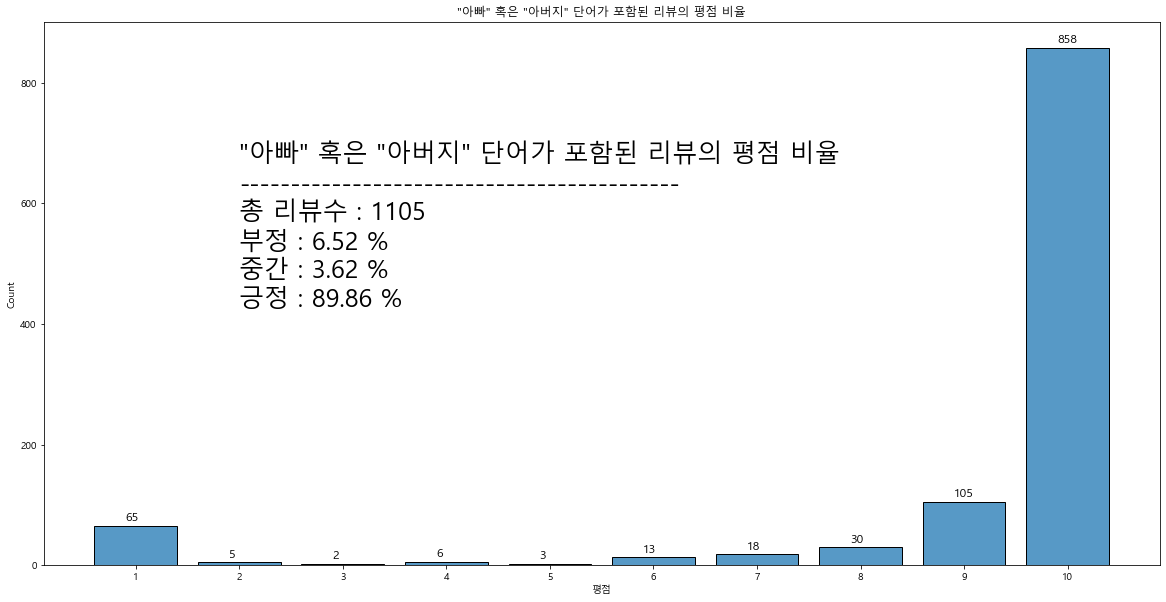

In [15]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)

df = reviews.loc[(reviews["아버지"] == 1) | (reviews["아빠"] == 1), ]
    
sns.histplot(df["평점"], binwidth=1, discrete=True, shrink=0.8, ax=ax1)
for i in range(1, len(df["평점"].value_counts()) + 1):
    plt.text(i-1/10, df["평점"].value_counts().sort_index()[i] + (df["평점"].value_counts().max() / 100), df["평점"].value_counts().sort_index()[i], fontsize=12)

title_str = '"아빠" 혹은 "아버지" 단어가 포함된 리뷰의 평점 비율'

total_reviews = len(df["평점"])
negative_str = f'부정 : {round(df["평점"].value_counts().sort_index()[0:3].sum() / df["평점"].value_counts().sum() * 100, 2)} %'
medium_str = f'중간 : {round(df["평점"].value_counts().sort_index()[3:7].sum() / df["평점"].value_counts().sum() * 100, 2)} %'
positive_str = f'긍정 : {round(df["평점"].value_counts().sort_index()[7:10].sum() / df["평점"].value_counts().sum() * 100, 2)} %'

print_str = f"{title_str}\n-------------------------------------------\n총 리뷰수 : {total_reviews}\n{negative_str}\n{medium_str}\n{positive_str}"


plt.text(2, df["평점"].value_counts().max() / 2, print_str, fontsize=25)

ax1.set_title(title_str)
ax1.set_xticks(range(1,11))
plt.savefig("./data/plot/아빠.jpg")
plt.show()